In [1]:
#Import datset, show first lines
#Import dataset
import csv
import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Check if the file has been uploaded
file_name = next(iter(uploaded))

# Initialize an empty list to store the rows
data = []

# Open the CSV file and handle the delimiter
with open(file_name, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')

    # Skip the header row if needed
    # next(reader)  # Uncomment this line if the first row is the header

    # Append each row to the data list
    for row in reader:
        data.append(row)

# Create a Pandas DataFrame from the data
df = pd.DataFrame(data[1:], columns=data[0])

# Display the first few rows of the dataset
print(df.head())

# Check data types and missing values
print(df.info())

Saving tweets_remaining_09042020_16072020.csv to tweets_remaining_09042020_16072020.csv
  id                 created_at  \
0  1  2020-04-09 23:59:51+00:00   
1  2  2020-04-09 23:58:55+00:00   
2  3  2020-04-09 23:58:52+00:00   
3  4  2020-04-09 23:58:27+00:00   
4  5  2020-04-09 23:57:59+00:00   

                                           full_text  
0  @KennyDegu very very little volume. With $10T ...  
1  #ES_F achieved Target 2780 closing above 50% #...  
2  RT @KimbleCharting: Silver/Gold indicator crea...  
3  @Issaquahfunds Hedged our $MSFT position into ...  
4  RT @zipillinois: 3 Surprisingly Controversial ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923673 entries, 0 to 923672
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          923673 non-null  object
 1   created_at  923673 non-null  object
 2   full_text   923673 non-null  object
dtypes: object(3)
memory usage: 21.1+ MB
None


In [2]:
# Preprocessing the dataset. Used Stemming Steps. Saved file removing not preprocessed tweets (column 'full_text').
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Read the uploaded CSV file
uploaded_file_name = "tweets_remaining_09042020_16072020.csv"
df = pd.read_csv(uploaded_file_name, delimiter=';')

# Download stopwords and initialize the stemmer
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Step 1: Tokenization
df['PreProcStem'] = df['full_text'].apply(lambda text: ' '.join(word_tokenize(text)))

# Step 2: Stop word removal
df['PreProcStem'] = df['PreProcStem'].apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))

# Step 3: Short words removal (less than 3 characters)
df['PreProcStem'] = df['PreProcStem'].apply(lambda text: ' '.join([word for word in text.split() if len(word) > 2]))

# Step 4: Case conversion (convert all to lowercase)
df['PreProcStem'] = df['PreProcStem'].apply(lambda text: text.lower())

# Step 5: Stemming
df['PreProcStem'] = df['PreProcStem'].apply(lambda text: ' '.join([stemmer.stem(word) for word in text.split()]))

# Step 6: Symbol removal
df['PreProcStem'] = df['PreProcStem'].apply(lambda text: re.sub(r'[@$#\'.",!?():]', '', text))

# Step 7: Remove digits
df['PreProcStem'] = df['PreProcStem'].apply(lambda text: re.sub(r'\d+', '', text))

# Step 8: Remove URLs and HTTP/HTTPS links
import re

# Assuming 'PreProcStem' is the column containing the text data
df['PreProcStem'] = df['PreProcStem'].apply(lambda text: re.sub(r'http[s]?://\S+', '', text))

# Save the preprocessed DataFrame to a CSV file with and without the original "full_text" column
preprocessed_file_name = "PreProc_Stem.csv"
preprocessed_no_text_column_file_name = "PreProc_Stem.csv"
df.to_csv(preprocessed_file_name, index=False)
df.drop(columns=['full_text'], inplace=True)  # Drop the "full_text" column
df.to_csv(preprocessed_no_text_column_file_name, index=False)

# Print the first 5 lines of the preprocessed DataFrame
print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


   id                 created_at  \
0   1  2020-04-09 23:59:51+00:00   
1   2  2020-04-09 23:58:55+00:00   
2   3  2020-04-09 23:58:52+00:00   
3   4  2020-04-09 23:58:27+00:00   
4   5  2020-04-09 23:57:59+00:00   

                                         PreProcStem  
0  kennydegu littl volum with t think could spx t...  
1  es_f achiev target  close fibonacci level mome...  
2  kimblechart silver/gold indic creat one larges...  
3  issaquahfund hedg msft posit close seem get la...  
4  zipillinoi surprisingli controversi stock dona...  


In [3]:
#Check for blank lines and remove
import pandas as pd

# Read the CSV file with comma delimiter
input_file_name = "PreProc_Stem.csv"
df = pd.read_csv(input_file_name, delimiter=',')

# Check the column names
print(df.columns)

# Remove 'http' from the 'PreProcStem' column
df['PreProcStem'] = df['PreProcStem'].str.replace('http', '', regex=False)

# Check for and remove blank lines
df.dropna(subset=['PreProcStem'], inplace=True)

# Save the DataFrame to a new CSV file without blank lines
output_file_name = "PreProc_Stem_cleaned.csv"
df.to_csv(output_file_name, index=False, sep=',')


Index(['id', 'created_at', 'PreProcStem'], dtype='object')


In [4]:
import pandas as pd
from textblob import TextBlob

# Read the uploaded CSV file
uploaded_file_name = "PreProc_Stem_cleaned.csv"
df = pd.read_csv(uploaded_file_name, delimiter=',')

# Function to get TextBlob sentiment polarity for each text
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply TextBlob sentiment analysis to the 'PreProcStem' column and store the results in a new column 'TextBlob_Sentiment'
df['TextBlob_Sentiment'] = df['PreProcStem'].apply(get_textblob_sentiment)

# Save the DataFrame to a new CSV file
textblob_output_file_name = "PreProc_Stem_Textblob.csv"
df.to_csv(textblob_output_file_name, index=False)

# Display the first 5 lines of the resulting file
print(f"First 5 lines of {textblob_output_file_name}:")
with open(textblob_output_file_name, 'r') as file:
    for i, line in enumerate(file):
        if i < 5:
            print(line.strip())
        else:
            break

First 5 lines of PreProc_Stem_Textblob.csv:
id,created_at,PreProcStem,TextBlob_Sentiment
1,2020-04-09 23:59:51+00:00,kennydegu littl volum with t think could spx trade ,0.0
2,2020-04-09 23:58:55+00:00,es_f achiev target  close fibonacci level momentum still possibl push toward - next week spx spi tradign futur  //tco/wdanc,0.0
3,2020-04-09 23:58:52+00:00,kimblechart silver/gold indic creat one largest bullish revers pattern decad test multi-decad suppor…,0.0
4,2020-04-09 23:58:27+00:00,issaquahfund hedg msft posit close seem get lazi past week,-0.25


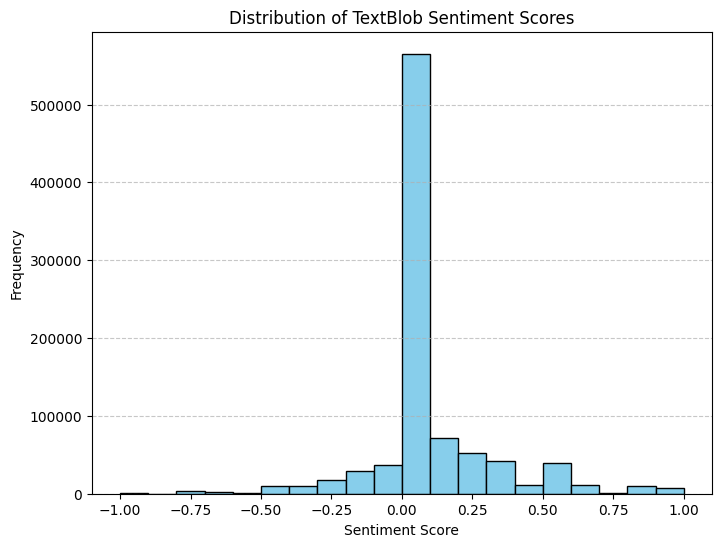

In [5]:
#Sentiment distribution - TextBlob - preprocessed dataset
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path for your TextBlob sentiment analysis results
file_path = "/content/PreProc_Stem_Textblob.csv"

# Try different encodings
encodings_to_try = ['utf-8', 'latin1', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv(file_path, encoding=encoding, delimiter=',')
        break  # If successful, exit the loop
    except pd.errors.ParserError:
        continue

# Plot the distribution of TextBlob sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(df['TextBlob_Sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of TextBlob Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
#Format created_at to bring date yyyy-mm-dd only (no hour)
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('PreProc_Stem_Textblob.csv')

# Convert the 'created_at' column to a datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract the date (yyyy-mm-dd) and store it in the 'created_at' column
df['created_at'] = df['created_at'].dt.date

# Save the updated DataFrame back to the CSV file
df.to_csv('PreProc_Stem_Textblob.csv', index=False)

# Print the first 5 lines of the saved file
with open('PreProc_Stem_Textblob.csv', 'r') as file:
    for i in range(5):
        print(file.readline().strip())

id,created_at,PreProcStem,TextBlob_Sentiment
1,2020-04-09,kennydegu littl volum with t think could spx trade ,0.0
2,2020-04-09,es_f achiev target  close fibonacci level momentum still possibl push toward - next week spx spi tradign futur  //tco/wdanc,0.0
3,2020-04-09,kimblechart silver/gold indic creat one largest bullish revers pattern decad test multi-decad suppor…,0.0
4,2020-04-09,issaquahfund hedg msft posit close seem get lazi past week,-0.25


In [11]:
#Daily Average Text_Blob
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('PreProc_Stem_Textblob.csv')

# Convert the 'created_at' column to a datetime format
df['created_at'] = pd.to_datetime(df['created_at']).dt.date

# Calculate the daily average sentiment score
daily_average_sentiment = df.groupby('created_at')['TextBlob_Sentiment'].mean()

# Find the most frequent sentiment for each day
most_frequent_sentiment = df.groupby('created_at')['TextBlob_Sentiment'].apply(lambda x: x.mode().iloc[0])

# Create a DataFrame with the results
result_df = pd.DataFrame({'Average_Sentiment': daily_average_sentiment, 'Most_Frequent_Sentiment': most_frequent_sentiment})

# Reset the index to have 'created_at' as a regular column
result_df.reset_index(inplace=True)

# Save the resulting DataFrame as 'PreProc_Stem_Textblob_Daily.csv'
result_df.to_csv('PreProc_Stem_Textblob_Daily.csv', index=False)

# Print the result
print(result_df)


    created_at  Average_Sentiment  Most_Frequent_Sentiment
0   2020-04-09           0.071710                      0.0
1   2020-04-10           0.082570                      0.0
2   2020-04-11           0.099481                      0.0
3   2020-04-12           0.088452                      0.0
4   2020-04-13           0.078538                      0.0
..         ...                ...                      ...
72  2020-07-12           0.084934                      0.0
73  2020-07-13           0.091082                      0.0
74  2020-07-14           0.086973                      0.0
75  2020-07-15           0.087932                      0.0
76  2020-07-16           0.093567                      0.0

[77 rows x 3 columns]


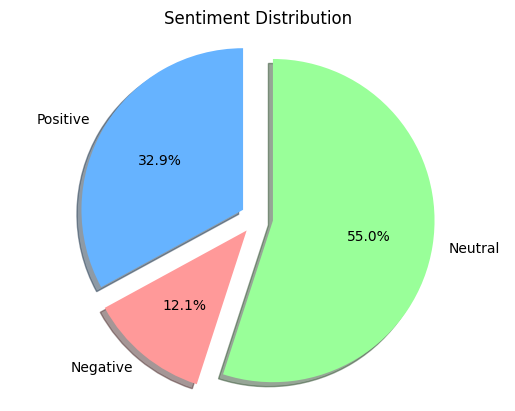

In [12]:
#Pie Chart Daily Average
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('PreProc_Stem_Textblob.csv')

# Extract the TextBlob sentiment scores
textblob_scores = df['TextBlob_Sentiment']

# Determine the sentiment categories based on the TextBlob scores
positive_count = (textblob_scores > 0).sum()
negative_count = (textblob_scores < 0).sum()
neutral_count = (textblob_scores == 0).sum()

# Calculate the percentages
total_count = len(df)
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
neutral_percentage = (neutral_count / total_count) * 100

# Create a pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_percentage, negative_percentage, neutral_percentage]
colors = ['#66b3ff', '#ff9999', '#99ff99']  # Blue, Red, Green
explode = (0.1, 0.1, 0.1)  # Explode slices

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.title('Sentiment Distribution')
plt.show()


In [14]:
#Upload S&P dataset
from google.colab import files

# Upload the dataset file
uploaded = files.upload()

Saving S&P500_2020_Apr_Jul.xlsx to S&P500_2020_Apr_Jul.xlsx


In [15]:
#Prepare stock prices dataset: date format, date column name to index, includes all dates from Apr09 to Jul 16, 2020, interpolate
import pandas as pd

# Load the dataset and ensure 'Date' is a datetime column
file_name = "S&P500_2020_Apr_Jul.xlsx"
df = pd.read_excel(file_name)
df['Date'] = pd.to_datetime(df['Date']).dt.date  # Extract date part and remove time

# Rename the 'Index' column to 'Date'
df.rename(columns={'Index': 'Date'}, inplace=True)

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample the DataFrame to fill in missing dates
date_range = pd.date_range(start='2020-04-09', end='2020-07-16', freq='D')
df = df.reindex(date_range)

# Interpolate missing values using linear interpolation
df.interpolate(method='linear', inplace=True)

# Reset the index if needed
df.reset_index(inplace=True)

# Save the updated DataFrame to a new file
output_file_name = "S&P500_2020_Apr_Jul_with_Interpolation.xlsx"
df.to_excel(output_file_name, index=False)

# Check the first few rows of the updated DataFrame
print(df.head())

       index       Open       High        Low      Close  Adj Close  \
0 2020-04-09  2776.9900  2818.5700  2762.3600  2789.8200  2789.8200   
1 2020-04-10  2778.3575  2809.5425  2752.0625  2782.7725  2782.7725   
2 2020-04-11  2779.7250  2800.5150  2741.7650  2775.7250  2775.7250   
3 2020-04-12  2781.0925  2791.4875  2731.4675  2768.6775  2768.6775   
4 2020-04-13  2782.4600  2782.4600  2721.1700  2761.6300  2761.6300   

         Volume  
0  7.899550e+09  
1  7.254545e+09  
2  6.609540e+09  
3  5.964535e+09  
4  5.319530e+09  


In [16]:
#Calculate StockChange
import pandas as pd

# Load the dataset from the existing file
file_name = "S&P500_2020_Apr_Jul_with_Interpolation.xlsx"
df = pd.read_excel(file_name)

# Calculate the 'StockChange' column
df['StockChange'] = (df['Close'] - df['Open']) / df['Open']

# Save the updated DataFrame to the same file
df.to_excel(file_name, index=False)

# Print the first few rows of the updated DataFrame
print(df.head())

       index       Open       High        Low      Close  Adj Close  \
0 2020-04-09  2776.9900  2818.5700  2762.3600  2789.8200  2789.8200   
1 2020-04-10  2778.3575  2809.5425  2752.0625  2782.7725  2782.7725   
2 2020-04-11  2779.7250  2800.5150  2741.7650  2775.7250  2775.7250   
3 2020-04-12  2781.0925  2791.4875  2731.4675  2768.6775  2768.6775   
4 2020-04-13  2782.4600  2782.4600  2721.1700  2761.6300  2761.6300   

         Volume  StockChange  
0  7.899550e+09     0.004620  
1  7.254545e+09     0.001589  
2  6.609540e+09    -0.001439  
3  5.964535e+09    -0.004464  
4  5.319530e+09    -0.007486  


In [17]:
# Variable Result_StockChange - the code loads a dataset, ensures that the 'Date' column contains
# only date values, fills in missing dates, interpolates missing values, resets the index if needed,
# saves the updated DataFrame to a new file, and prints the first few rows of the updated DataFrame.
# The overall goal is to clean and prepare the data for further analysis.

file_name = "S&P500_2020_Apr_Jul_with_Interpolation.xlsx"
df = pd.read_excel(file_name)

# Calculate the 'StockChange' column
df['StockChange'] = (df['Close'] - df['Open']) / df['Open']

# Define a function to calculate 'Result_StockChange' based on 'StockChange'
def calculate_result(stock_change):
    if stock_change > 0:
        return 1
    elif stock_change < 0:
        return -1
    else:
        return 0  # You can set this value for cases when stock_change is exactly zero

# Add the 'Result_StockChange' column based on 'StockChange'
df['Result_StockChange'] = df['StockChange'].apply(calculate_result)

# Save the updated DataFrame to the same file
df.to_excel(file_name, index=False)

# Print the first few rows of the updated DataFrame
print(df.head())

       index       Open       High        Low      Close  Adj Close  \
0 2020-04-09  2776.9900  2818.5700  2762.3600  2789.8200  2789.8200   
1 2020-04-10  2778.3575  2809.5425  2752.0625  2782.7725  2782.7725   
2 2020-04-11  2779.7250  2800.5150  2741.7650  2775.7250  2775.7250   
3 2020-04-12  2781.0925  2791.4875  2731.4675  2768.6775  2768.6775   
4 2020-04-13  2782.4600  2782.4600  2721.1700  2761.6300  2761.6300   

         Volume  StockChange  Result_StockChange  
0  7.899550e+09     0.004620                   1  
1  7.254545e+09     0.001589                   1  
2  6.609540e+09    -0.001439                  -1  
3  5.964535e+09    -0.004464                  -1  
4  5.319530e+09    -0.007486                  -1  


In [21]:
#code combines data from two different sources (df1 and df2) by adding the 'Result_StockChange'
#column from df1 ("S&P500_2020_Apr_Jul_with_Interpolation.xlsx.") to df2 ("PreProc_Stem_Vader_Daily.csv.").
#Then, it saves the updated df2 DataFrame to a new CSV file for further
# analysis or storage.
import pandas as pd

# Load the data from both files
df1 = pd.read_excel("S&P500_2020_Apr_Jul_with_Interpolation.xlsx")
df2 = pd.read_csv("PreProc_Stem_Textblob_Daily.csv")

# Copy the 'Result_StockChange' column from df1 to df2
df2['Result_StockChange'] = df1['Result_StockChange']

# Save the updated df2 back to a CSV file
df2.to_csv("mean_sentiment_by_date_TB_updated.csv", index=False)


In [22]:
#reads the updated CSV file containing data, specifically the "mean_sentiment_by_date_TB_updated.csv"
#file, into a DataFrame and then displays the first 5 rows of that
#DataFrame to show a preview of the data.

import pandas as pd

# Load the updated CSV file
df_updated = pd.read_csv("mean_sentiment_by_date_TB_updated.csv")

# Display the first 5 rows of the DataFrame
print(df_updated.head())


   created_at  Average_Sentiment  Most_Frequent_Sentiment  Result_StockChange
0  2020-04-09           0.071710                      0.0                   1
1  2020-04-10           0.082570                      0.0                   1
2  2020-04-11           0.099481                      0.0                  -1
3  2020-04-12           0.088452                      0.0                  -1
4  2020-04-13           0.078538                      0.0                  -1


In [35]:
#performs data preprocessing to convert date columns, calculate the numeric index based on a reference date,
#and ensure numeric data types in the 'Result_StockChange' column. The resulting DataFrame is ready for
#further analysis or modeling.
import pandas as pd

# Load the dataset
df = pd.read_csv("mean_sentiment_by_date_TB_updated.csv")

# Convert the "created_at" column to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Define a reference date
reference_date = pd.to_datetime('2020-01-01')

# Calculate the number of days since the reference date
df['numeric_index'] = (df['created_at'] - reference_date).dt.days

# Drop the original "created_at" column
df = df.drop(columns=['created_at'])

# Ensure that "Result_StockChange" is numeric
df['Result_StockChange'] = pd.to_numeric(df['Result_StockChange'], errors='coerce')

# Now, df is a preprocessed dataset with numeric columns, including "numeric_index"



In [40]:
#Apply SVM ; calculates Accuracy, F-score and AUC (Area Under Curve)
#Apply SVM ; calculates Accuracy, F-score and AUC (Area Under Curve)
# Apply SVM ; calculates Accuracy, F-score, and AUC (Area Under Curve)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_recall_curve, auc

# Load the preprocessed dataset
df = pd.read_csv("mean_sentiment_by_date_TB_updated.csv")

# Split the data into features (X) and the target variable (y)
X = df.drop(columns=["Result_StockChange"])
y = df["Result_StockChange"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.drop(columns=["created_at"])
X_test = X_test.drop(columns=["created_at"])

# Initialize the SVM classifier
svm_classifier = SVC()

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F-Score
f_score = f1_score(y_test, y_pred)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F-Score: {f_score:.2f}")
print(f"AUC: {roc_auc:.2f}")

# Calculate Precision, Recall, and F1-Score
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
f1_scores = 2 * (precision * recall) / (precision + recall)

# Calculate ROC-AUC
roc_auc_curve = roc_auc_score(y_test, y_pred)

# Calculate PR-AUC (Area Under the Precision-Recall Curve)
pr_auc_curve = auc(recall, precision)

print(f"Precision: {precision[1]:.2f}")
print(f"Recall: {recall[1]:.2f}")
print(f"F1-Score: {f1_scores[1]:.2f}")
print(f"ROC-AUC: {roc_auc_curve:.2f}")
print(f"PR-AUC: {pr_auc_curve:.2f}")

from sklearn.metrics import fbeta_score

# Calculate F-Score with beta=2
f_beta_score = fbeta_score(y_test, y_pred, beta=2)

print(f"F-Score (beta=2): {f_beta_score:.2f}")

Accuracy: 56.25%
F-Score: 0.72
AUC: 0.50
Precision: 1.00
Recall: 0.00
F1-Score: 0.00
ROC-AUC: 0.50
PR-AUC: 0.78
F-Score (beta=2): 0.87


In [43]:
#Logistic Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, fbeta_score, roc_curve, auc, average_precision_score

# Load the preprocessed dataset
df = pd.read_csv("mean_sentiment_by_date_TB_updated.csv")

# Split the data into features (X) and the target variable (y)
X = df.drop(columns=["Result_StockChange"])
y = df["Result_StockChange"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.drop(columns=["created_at"])
X_test = X_test.drop(columns=["created_at"])

# Initialize the Logistic Regression classifier
logistic_classifier = LogisticRegression()

# Fit the classifier to the training data
logistic_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_classifier.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F-Score
f_score = f1_score(y_test, y_pred)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate Precision
precision = precision_score(y_test, y_pred)

# Calculate Recall
recall = recall_score(y_test, y_pred)

# Calculate F1-Score (beta=2)
f_beta_score = fbeta_score(y_test, y_pred, beta=2)

# Calculate ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc_curve = auc(fpr, tpr)

# Calculate PR-AUC (Area Under the Precision-Recall Curve)
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)
pr_auc_curve = auc(recall_curve, precision_curve)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F-Score: {f_score:.2f}")
print(f"AUC: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f_beta_score:.2f}")
print(f"ROC-AUC: {roc_auc_curve:.2f}")
print(f"PR-AUC: {pr_auc_curve:.2f}")



Accuracy: 56.25%
F-Score: 0.72
AUC: 0.50
Precision: 0.56
Recall: 1.00
F1-Score: 0.87
ROC-AUC: 0.50
PR-AUC: 0.78
